In [276]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Численное решение задачи Коши
# для обыкновенных дифференциальных уравнений

In [277]:
v0 = 5
w0 = 2
h = 0.001
T = 5
a1 = 10
a2 = 2
a3 = 5
a4 = 1  
t = np.arange(0, T, step=h)
n = len(t)
t, n

(array([0.000e+00, 1.000e-03, 2.000e-03, ..., 4.997e+00, 4.998e+00,
        4.999e+00]),
 5000)

In [278]:
def fv(v, w, a1, a2):
    return (a1 - (a2 * w)) * v


def fw(v, w, a3, a4):
    return ((a4 * v) - a3) * w

In [279]:
def solve_kutta(v0=5, w0=2, h=0.001, T=5, a1=10, a2=2, a3=5, a4=1):
    t = np.arange(0, T, step=h)
    n = len(t)
    v = np.zeros(n)
    w = np.zeros(n)
    v[0] = v0
    w[0] = w0
    for i in range(1, n):
        v_i = v[i - 1]
        w_i = w[i - 1]
        k1 = fv(v_i, w_i, a1, a2)
        q1 = fw(v_i, w_i, a3, a4)
        k2 = fv(v_i + h * k1 / 2, w_i + h * q1 / 2, a1, a2)
        q2 = fw(v_i + h * k1 / 2, w_i + h * q1 / 2, a3, a4)
        k3 = fv(v_i + h * k2 / 2, w_i + h * q2 / 2, a1, a2)
        q3 = fw(v_i + h * k2 / 2, w_i + h * q2 / 2, a3, a4)
        k4 = fv(v_i + h * k3, w_i + h * q3, a1, a2)
        q4 = fw(v_i + h * k3, w_i + h * q3, a3, a4)
        v[i] = v_i + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        w[i] = w_i + h * (q1 + 2 * q2 + 2 * q3 + q4) / 6
    return v, w, t, n

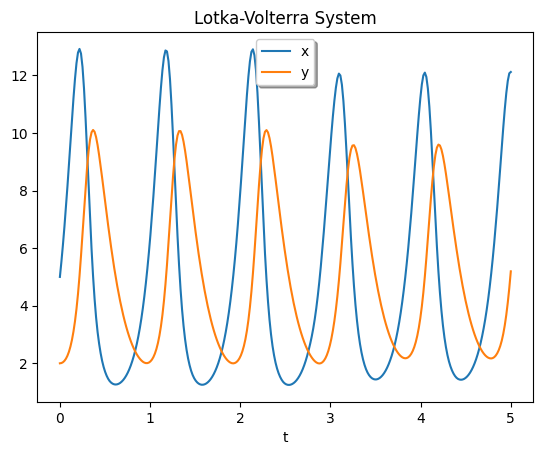

In [280]:
def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    return [a * x - b * x * y, -c * y + d * x * y]


sol = solve_ivp(
    lotkavolterra, [0, T], [v0, w0], args=(a1, a2, a3, a4), dense_output=True
)
t = np.linspace(0, T, 300)

z = sol.sol(t)

import matplotlib.pyplot as plt

plt.plot(t, z.T)

plt.xlabel("t")

plt.legend(["x", "y"], shadow=True)

plt.title("Lotka-Volterra System")

plt.show()

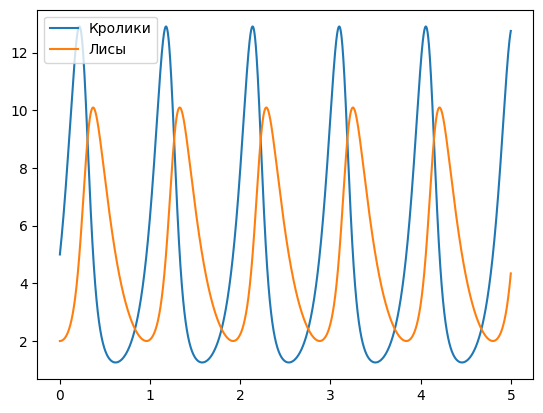

In [281]:
v, w, t, n = solve_kutta()
plt.plot(t, v, label="Кролики")
plt.plot(t, w, label="Лисы")
plt.legend()
plt.show()

a_1 - скорость увеличения популяции жертвы
a_2 - коэффициент хищничества для жертвы
a_3 - смертность хищника
a_4 - обеспечивает рост популяции при поедании жертвы

Возьмем как начальное число жертв и хищников - 10, 5
a_1 = 1 
a_2 = 0.2
a_3 = 0.6
a_4 = 0.5

При подобных коэффициентах и начальной популяции будет баланс, где кролики могут размножиться, при уменьшении количества лис, так как a_2 не позволяет так часто умирать кроликам, а лисы не увеличиваться кардинально в популяции, так как a_4 сдерживает их прирост при поедании кроликов

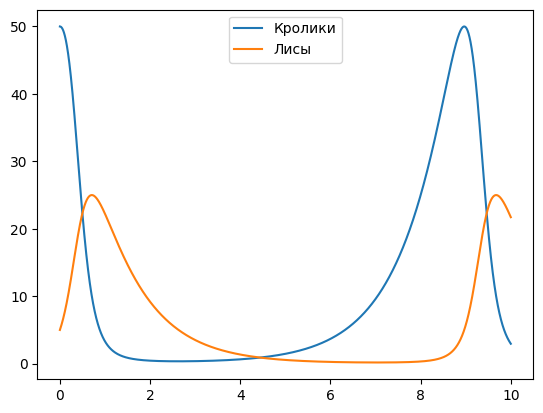

In [282]:
v, w, t, n = solve_kutta(v0=50, w0=5, a1=1, a2=0.2, a3=1, a4=0.1, T=10)
plt.plot(t, v, label="Кролики")
plt.plot(t, w, label="Лисы")
plt.legend()
plt.show()

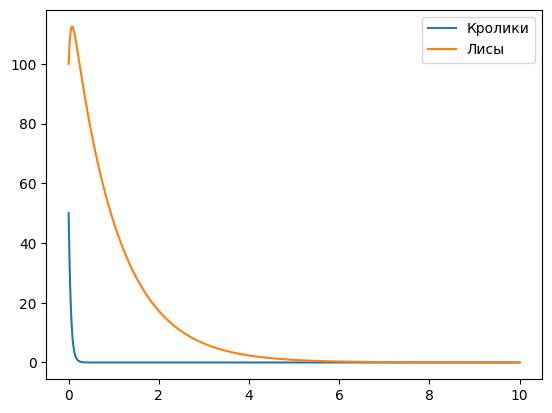

In [283]:
v, w, t, n = solve_kutta(v0=50, w0=100, a1=1, a2=0.2, a3=1, a4=0.1, T=10)
plt.plot(t, v, label="Кролики")
plt.plot(t, w, label="Лисы")
plt.legend()
plt.show()

Если лис будет больше, чем кроликов, то придёт смерть всех, хоть график и показывает, что кролики с нуля возраждаются, но мне кажется, что это погрешность вычислений.

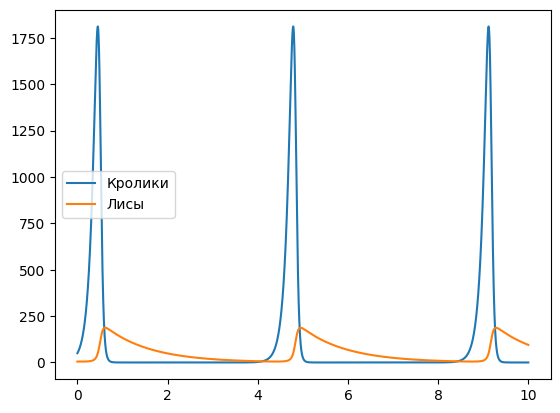

In [284]:
v, w, t, n = solve_kutta(v0=50, w0=5, a1=10, a2=0.2, a3=1, a4=0.01, T=10)
plt.plot(t, v, label="Кролики")
plt.plot(t, w, label="Лисы")
plt.legend()
plt.show()

a_1 - рождаемость жертвы увеличивает их количество, но также и увеличивает количество новых хищников засчёт того, что те их кушают, поэтому рождаемость a_4 хищников засчёт жертв надо уменьшить. Тогда кроликов будет очень много, но лисы будут их убивать, также много, как и раньше, только не увеличиваясь сильно по популяции, в данном случае случилось так, что лисы убили всех кроликов и умерли

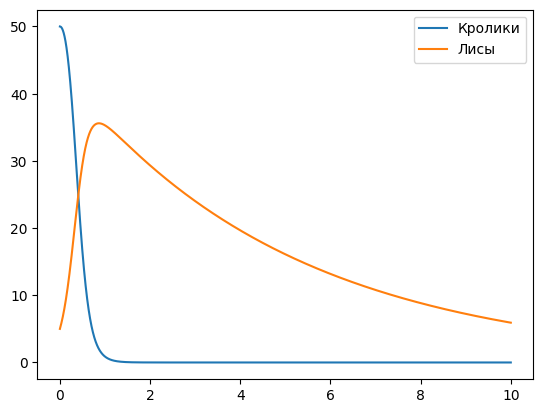

In [285]:
v, w, t, n = solve_kutta(v0=50, w0=5, a1=1, a2=0.2, a3=0.2, a4=0.1, T=10)
plt.plot(t, v, label="Кролики")
plt.plot(t, w, label="Лисы")
plt.legend()
plt.show()

Очевидно, если a_3 хищники будут меньше умирать, то популяция жертв будет в будущем на нуле

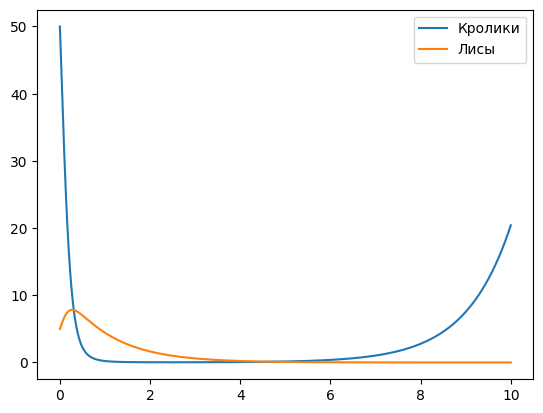

In [286]:
v, w, t, n = solve_kutta(v0=50, w0=5, a1=1, a2=1, a3=1, a4=0.1, T=10)
plt.plot(t, v, label="Кролики")
plt.plot(t, w, label="Лисы")
plt.legend()
plt.show()

Если a_2 будет большим, то и популяция кроликов значительно уменьшиться, что приведет к погибили всех